<a href="https://colab.research.google.com/github/ethancraycroft/MLA_ETC/blob/main/MLA2_ETC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Assignment 2**
#**ETHAN CRAYCROFT**
#**CS430-ON**
#**Machine Learning in the Cloud**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [4]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier


#Include imports for both Linear Regression and Logistic Regression
Here I imported linear and logistic regression 

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Load the Steel_industry_data.csv into a data frame named df.
Loaded in the dataset and named it 'df'.

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

#Rename the columns according to Table 1: Columns Names.
Appropriately renamed the columns in the dataset.

In [9]:
df.rename(columns={"Usage_kWh": "usage_kwh", "Lagging_Current_Reactive.Power_kVarh": "lag_react_pwr_kvarh", "Leading_Current_Reactive_Power_kVarh": "lead_react_pwr_kvarh", "Lagging_Current_Power_Factor": "lag_current_pwr", "Leading_Current_Power_Factor": "lead_current_pwr", "NSM": "nsm", "WeekStatus": "week_status", "Day_of_week": "day_of_week", "Load_Type": "load_type",}, inplace=True)

In [10]:
df.load_type

0        Light_Load
1        Light_Load
2        Light_Load
3        Light_Load
4        Light_Load
            ...    
35035    Light_Load
35036    Light_Load
35037    Light_Load
35038    Light_Load
35039    Light_Load
Name: load_type, Length: 35040, dtype: object

In [11]:
df.describe()

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


#Get the counts of the different load types. Save this into a data frame so you can plot it.
Here I create a new dataframe and load it with the count of the loadtypes grouped by their load type. Light load has the most, followed by medium, then maximum.

In [12]:
load_type_totals = df.load_type.groupby(df.load_type).count()
load_type_totals

load_type
Light_Load      18072
Maximum_Load     7272
Medium_Load      9696
Name: load_type, dtype: int64

#Create a pairplot of all of the numerical variables using Seaborn.
Below, I create a pairplot using the 'df' dataframe.

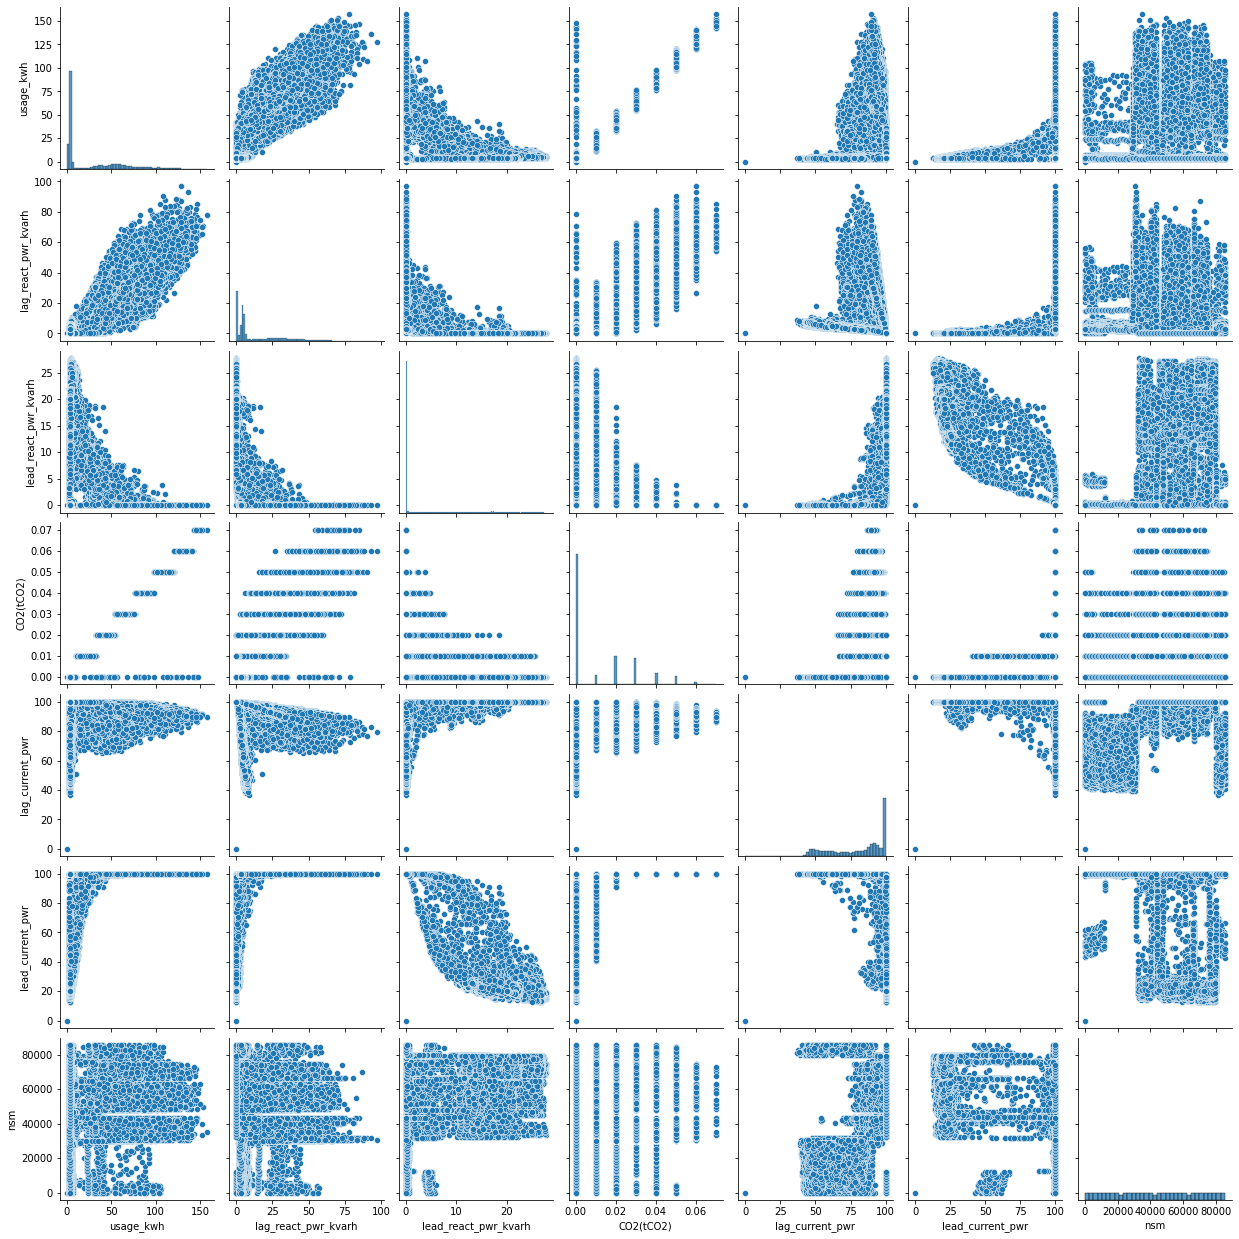

In [13]:
sns.pairplot(df)

#In a Markdown comment - write up any interesting patterns you see from the pairplot.
One interesting thing that I noticed about this pairplot was the relationship between lead_react_pwr_kvarh and lead_current_pwr. Although this may look like a giat cluster of points, upon closer examination you can notice a linear trend with this data. As the lead_reach_pwr_kvarh increases, the lead_current_pwr tends to decrease. Another thing that I noticed and may be important, is the trend between CO2(tCO2) and usage_kwh. As you may expect, as usage increases so does the CO2. There also appears to be several logarithmic relationships in this data set, including lead_react_pwr_kvarh vs lag_current_pwr.

#Create a data frame called X of your inputs that includes all columns except date and usage_kwh.
Here I create the X dataframe using the appropriate data from the 'df' dataframe.

In [14]:
X = df.iloc[:,2:]

#Create a data frame called y of your output that includes only usage_kwh. This will be your target variable that you are trying to predict.
Here I create the y datafrom using the usage_kwh column from the 'df' dataframe.

In [15]:
y = df[['usage_kwh']]
y

,usage_kwh
0,3.17
1,4.00
2,3.24
3,3.31
4,3.82
...,...
35035,3.85
35036,3.74
35037,3.78
35038,3.78


#Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.
Here I create the Train and Test sets. 

In [16]:
df.dtypes

date                     object
usage_kwh               float64
lag_react_pwr_kvarh     float64
lead_react_pwr_kvarh    float64
CO2(tCO2)               float64
lag_current_pwr         float64
lead_current_pwr        float64
nsm                       int64
week_status              object
day_of_week              object
load_type                object
dtype: object

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=10)

#Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output).
Here I separate the numerical and categorical vairables into separate dataframes. This will allow me to OneHotEncode the categorical ones, and MinMax scale the numerical ones. 


In [18]:
num_attributes = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attributes = ['week_status', 'day_of_week', 'load_type']

In [19]:
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attributes),
                               ('num',MinMaxScaler(), num_attributes),]
                  )

#Create a pipeline that will transform the data and then run a LinearRegression.
Here I am creating the pipeline using the col_transform dataframe, and performing linear regression on it. 

In [20]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('mlr', LinearRegression()),
                     ])

In [21]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr', LinearRegression())])

#Run the pipeline to fit the Linear Regression Model.
Here I am fitting the pipeline with the appropriate dataframes (X_train and y_train).

In [22]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr', LinearRegression())])

#Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
Here I create the y_pred variable which will store the predicted y variables from X_test.


In [23]:
y_pred = pipeline.predict(X_test)

#Calculate the root mean squared error for both train and test. In a Markdown comment below the result, interpret the output you receive.


In [24]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_MSE = mean_squared_error(y_train, y_train_pred)**(0.5)
test_MSE = mean_squared_error(y_test, y_test_pred)**(0.5)

In [25]:
train_MSE

4.653659312103257

In [26]:
test_MSE

4.776588966467164

#Calculate the R-squared value of the model (test only).  In a Markdown comment below the result, interpret the output you receive.


In [27]:
r2_score(y_pred, y_test)

0.9790123577842728

#Write the code to display the intercept value(bias)  and coefficients of the model. (These will be two different lines of code).
Here I show the intercept value and coefficients of this model.

In [28]:
pipeline.named_steps['mlr'].intercept_


array([2.15673612e+13])

In [29]:
pipeline.named_steps['mlr'].coef_


array([[-2.69264825e+13, -3.66310664e+13,  6.88688969e+12,
         6.88688969e+12,  1.65914735e+13,  1.65914735e+13,
         6.88688969e+12,  6.88688969e+12,  6.88688969e+12,
        -1.52776834e+12, -1.52776834e+12, -1.52776834e+12,
         2.86576459e+01,  2.01307514e+00,  1.16671478e+02,
         7.10961604e+00,  4.97088281e+00, -3.29348087e-01]])

#You have already read the data into a dataframe named df.  However, you need to recode the 'week_status' column so a Weekday is coded as 1 and a Weekend is coded as a 0. 
Here I am recoding the columns of the 'df' dataframe so that a weekday = 1 and a weekend = 2.

In [30]:
df['week_status'] = df['week_status'].apply(lambda x: 1 if x == "Weekday" else 0)

#Create a data frame called X of your inputs that includes all columns except date, week_status, and day_of_week.
Here I create a new dataframe 'X' from the 'df' dataframe.

In [31]:
X = df[['usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'load_type']]

#Create a data frame called y that contains week_status. This will be your target variable.
Here I create the new dataframe 'y' from the 'df' dataframe. 

In [32]:
y = df[['week_status']]

#Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.
Here I create the 4 new dataframes by splitting up the existing data frame. 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=10)

#Create a column transformer that will OneHotEncode the categorical variables (not the output/target variable) and MinMax scale the numerical variables (not the output).
Here I am separating the numerical and categorical variables so they can be MinMax scaled and OneHotEncoded respectively. 


In [34]:
num_attribs = ['usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs = ['load_type']

col_transform_log = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs),
                               ('num',MinMaxScaler(), num_attribs),]
                  )

#Create a pipeline that will transform the data and then run a LogisticRegression.
Creating a pipeline and transforming the data, then performing logistic regression.

In [35]:
pipeline_log = Pipeline([
                     ('trans', col_transform_log),
                     ('mlr_log', LogisticRegression(max_iter=1000)),
                     ])

#Run the pipeline to fit the Logistic Regression Model.
Here I am fitting the pipeline with the training data

In [36]:
pipeline_log.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['usage_kwh',
                                                   'lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr_log', LogisticRegression(max_iter=1000))])

#Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
Here I create the variable y_pred to store predicted values based on the X_test dataframe.


In [37]:
y_pred = pipeline_log.predict(X_test)

#Call the plot_cm function to generate the confusion matrix.
Here I create the confusion matrix from the y_test and y_pred dataframes.


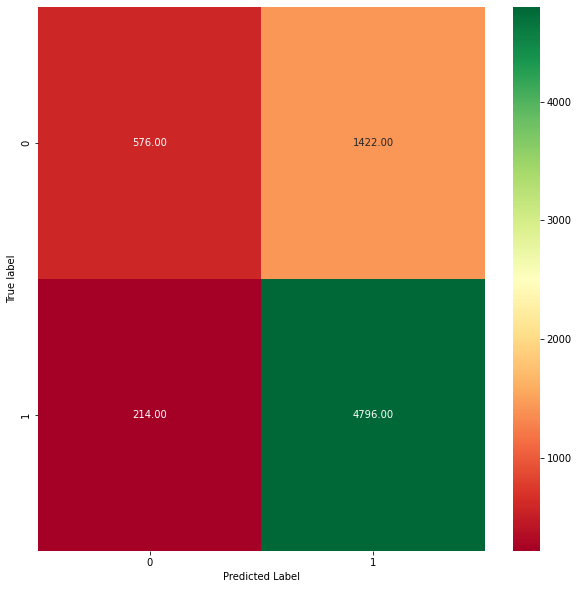

In [38]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

plot_cm(y_test, y_pred)

#Calculate the precision, recall, and F1 score. In a markdown comment below your results, interpret your results.
Here I will calculate the precision, recall, and F1 score of the predicted data.


In [39]:
precision_score(y_test,y_pred)


0.7713091026053394

In [40]:
recall_score(y_test,y_pred)


0.9572854291417165

In [41]:
f1_score(y_test,y_pred)

0.8542928393302458

comments

#Generate an ROC Curve or a Precision-Recall Curve as appropriate with (AUC). In a comment below your results, interpret your results and explain why your choice of curve.
Here I create an ROC Curve.


In [42]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

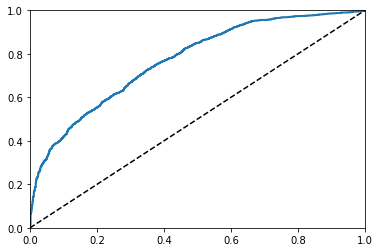

In [43]:
y_pred_prob = pipeline_log.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_prob)
plot_roc_curve(fpr, tpr)

In [44]:
area_under_curve = roc_auc_score(y_test, y_pred_prob)
area_under_curve

0.7695857034679391

Here I decided to use the ROC curve because of the number of positives. In our book, it states the the Precision-Recall curve should be used when the positive class is rare, or you care more about false positives than false negatives. Here, that is not the case. The positive class is not rare, so I went with the ROC curve. The results of this curve are okay, not great. Ideally, the AUC would be closer to .90, where this one sits at ~0.769.

#In a Markdown comment, write a conclusion on how suitable you think this model is for predicting week_status.


I think I would be fairly comfortable using this modile to predict the week status (weekend or weekday), but I definitely think there is plenty of room for improvement. The recall and F1 scores are the most convincing for me. The recall measures the true positives vs the false negatives. This number (.957) is VERY high and very good. This is very encouraging for the model. The precision measures the true postives vs the false positives. This number (0.771) is acceptable but not great. False positives are one of the weaknesses of this model. The F1 score combines the recall and precision, and this number (0.854) is also high, good, and encouraging. 

Overall, I am encouraged by the results of this model. In an ideal world, I would like to lower the number of false positives. However, the other predicted numbers are pretty great and I believe I could use this model to help predict week status. 